In [70]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn import  preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [71]:
#load the data
import pandas as pd
cell_df=pd.read_csv('cell_samples.csv')
cell_df.head(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


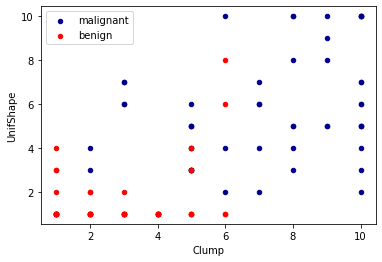

In [72]:
#Distribution of classes
ax=cell_df[cell_df['Class']==4][0:50].plot(kind='scatter', x='Clump', y='UnifShape', color = 'DarkBlue', label = 'malignant');
cell_df[cell_df['Class']==2][0:50].plot(kind='scatter', x= 'Clump', y = 'UnifShape', color = 'Red', label = 'benign', ax=ax);
plt.show()

In [73]:
#data preprocessing
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [74]:
#drop rows in BareNuc that contain values that are not numerical
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors = 'coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


In [75]:
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [76]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BlandChrom', 'NormNucl', 'Mit']]
X=np.asanyarray(feature_df)
X[0:5]

array([[5, 1, 1, 1, 2, 3, 1, 1],
       [5, 4, 4, 5, 7, 3, 2, 1],
       [3, 1, 1, 1, 2, 3, 1, 1],
       [6, 8, 8, 1, 3, 3, 7, 1],
       [4, 1, 1, 3, 2, 3, 1, 1]], dtype=int64)

In [77]:
cell_df['Class'] = cell_df['Class'].astype('int')
cell_df['Class']
y=np.array(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [78]:
#train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train set :', X_train.shape, y_train.shape)
print('Test set :', X_test.shape, y_test.shape)

Train set : (546, 8) (546,)
Test set : (137, 8) (137,)


In [79]:
#modelling
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC()

In [80]:
yhat= clf.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

In [81]:
#compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [2, 4])
np.set_printoptions(precision=2)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [85]:
#f1_score accuracy
f1_score(y_test, yhat, average = 'weighted')

0.9639038982104676

In [86]:
#jaccard_score accuracy
jaccard_score(y_test, yhat, pos_label = 2)

0.9444444444444444